# In this project we will analyse IPL matches from 2008 to 2020, try to discover hidden pattern and see the record of players and team

In [1]:
# install and import required libraryies
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
%matplotlib inline

In [2]:
matches = pd.read_csv('E:\\Surendra\\Kaggle_datasets\\archive\\matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


##### Let's get the basic idea about the datasets

In [3]:
# how matches are there in dataset
matches.shape

(756, 18)

There are total 757 matches are played.
we have 18 column

In [4]:
# data type of varible
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Summary of data
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
matches.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
215,216,2010,Nagpur,2010-04-10,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Deccan Chargers,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN
326,327,2012,Mumbai,2012-04-16,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,S Nadeem,Wankhede Stadium,BF Bowden,SK Tarapore,NaN
530,531,2015,Visakhapatnam,2015-04-18,Delhi Daredevils,Sunrisers Hyderabad,Delhi Daredevils,bat,normal,0,Delhi Daredevils,4,0,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
651,7909,2018,Mohali,19/04/18,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Kings XI Punjab,15,0,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ...",Nigel Llong,Anil Chaudhary,Vineet Kulkarni
165,166,2009,Centurion,2009-05-18,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,7,BJ Hodge,SuperSport Park,SJA Taufel,RB Tiffin,NaN


Let's see the unique value of column to underatand the data better


In [7]:
for col in matches:
    print(matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

In [8]:
matches['umpire3'].first_valid_index()

636

In [9]:

matches['umpire3'].isnull().sum()

637

In [10]:
matches['umpire3'].isnull().value_counts()

True     637
False    119
Name: umpire3, dtype: int64

###### In Third umpire column there are 636 NaN value

In [11]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

##### As off field umpire is insignificant we can drop umpire3 column

In [12]:
matches.drop(['umpire3'], axis = 1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


## Exploratory  data analysis and visualization

In [13]:
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

In [14]:
Team = matches.groupby('season')['winner'].value_counts()
Team

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [18]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in Team.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


###### Make a barplot for wining maximum matches in a season

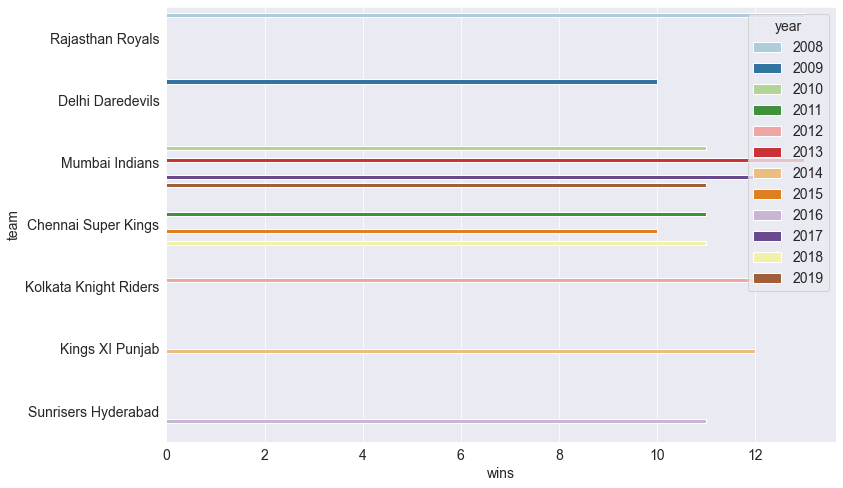

In [19]:
sns.barplot('wins', 'team',hue = 'year', data =  win_per_season_df, palette = 'Paired');

##### Mumbai Indians won maximum matches  per season in 2010 2013 2019 2017

### Venue that hosted maximum number of matches

In [22]:
venue = matches.venue.value_counts()

In [25]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

Text(0.5, 1.0, 'IPL Venue')

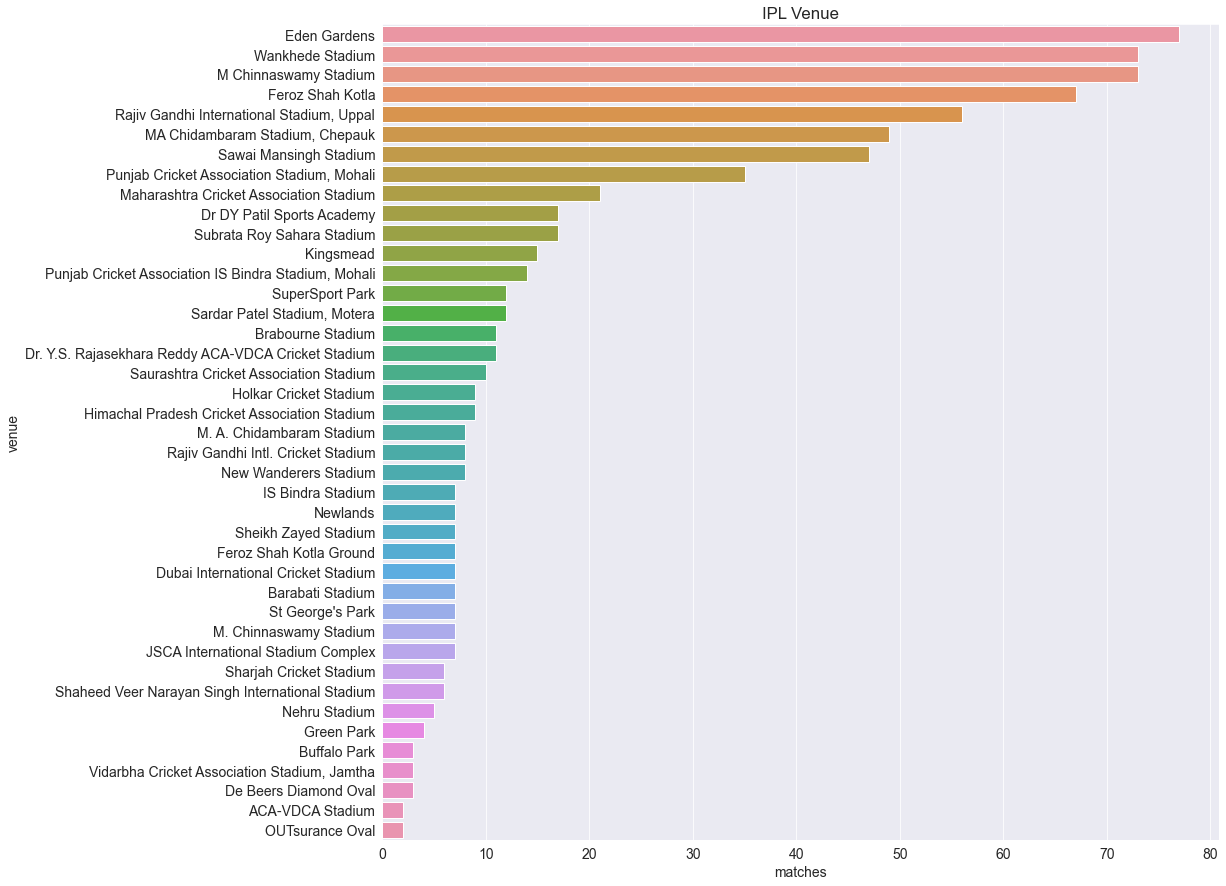

In [31]:
from matplotlib.pyplot import figure
figure(figsize= (15,15))

sns.barplot(x = 'matches', y = 'venue', data = venue_df)
plt.title('IPL Venue')

In [32]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


### Till now maximum matches are hosted by Eden Gardens followed by wankhede and chinnaswamy stadium and there is 40 venue total

### Team who is most successful and won the maximum matches 

In [34]:
team_wins_ser = matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [36]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


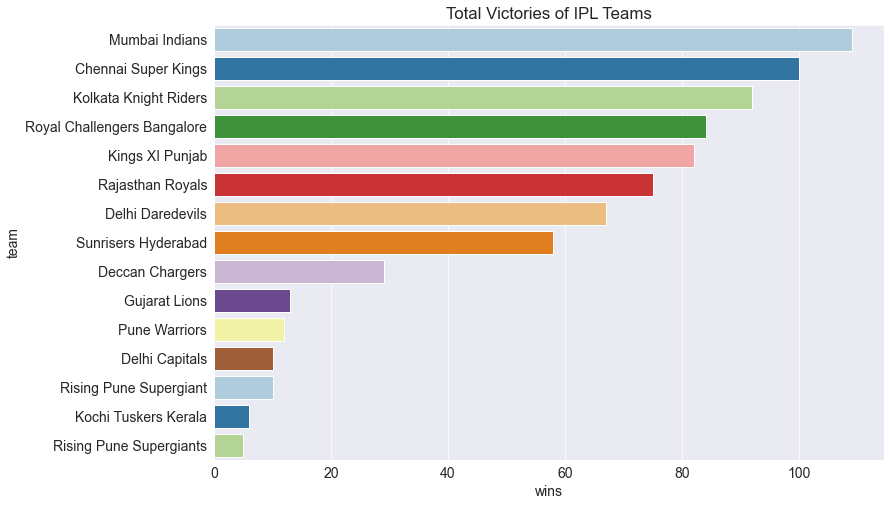

In [37]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

### Mumbai is most successful franchise in ipl by winning maximum matches

## Player won maximum number of times man of the match award

In [44]:
a  = matches['player_of_match'].value_counts()
a

CH Gayle           21
AB de Villiers     20
DA Warner          17
MS Dhoni           17
RG Sharma          17
                   ..
K Ahmed             1
S Sohal             1
AA Jhunjhunwala     1
J Archer            1
AD Mascarenhas      1
Name: player_of_match, Length: 226, dtype: int64

In [47]:
mvp_ser = matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

In [48]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


Text(0.5, 1.0, 'Number of time player won MOM awards')

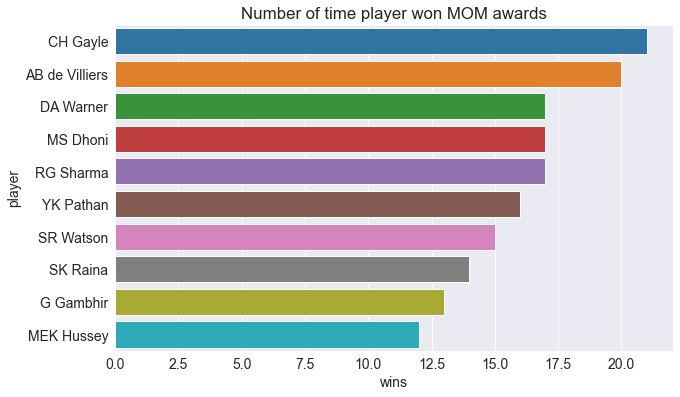

In [53]:
figure(figsize = (10,6))
sns.barplot(x= 'wins', y = 'player', data = mvp_ten_df)
plt.title('Number of time player won MOM awards')

#### Chris gayle won maximum number of time MOM award(21) followed by AB delivers and rohit sharma

## Asking and Answering Questions 

1)Team won by maximum runs

In [56]:
matches['win_by_runs'].max()

146

Team won by maximum runs is about 146 runs

2)Team win by maximum wicktes in hand

In [58]:
matches['win_by_wickets'].max()

10

best win by wickets ib 10 wicktes

3) which city hosted maximum matches

In [59]:
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Cuttack             7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

mumbai hosted maximum matches in ipl

4)Does winning toss have advantage?

In [62]:
win_count = 0
for index, value in matches.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(matches)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


So we can say winnning a toss have  slight edge with probability 0.52

In [66]:
os.getcwd()

'C:\\Users\\vicky'